# Heart Disease Predictions

## Libraries

In [1]:
# Install missing packages
%pip install imbalanced-learn
%pip install numpy

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Libraries for machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, log_loss,
    roc_curve, auc, confusion_matrix)

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
heart_disease_df = pd.read_csv("lg_heart_disease.csv")
heart_disease_df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,...,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status_Yes
0,69,Female,146.0,286.0,25.221799,8.744034,133.0,157.0,9.355389,19.298875,...,False,True,False,False,True,False,False,False,True,False
1,46,Male,126.0,216.0,29.855447,4.440440,393.0,92.0,12.709873,11.230926,...,False,True,True,True,False,True,False,True,False,False
2,32,Female,122.0,293.0,24.130477,5.249405,293.0,94.0,12.509046,5.961958,...,True,False,True,True,False,False,False,False,False,False
3,60,Male,166.0,242.0,20.486289,7.030971,263.0,154.0,10.381259,8.153887,...,True,False,False,True,False,False,False,False,False,False
4,25,Male,152.0,257.0,28.144681,5.504876,126.0,91.0,4.297575,10.815983,...,False,False,False,True,False,False,True,True,False,False


## Preparing the data

In [3]:
heart_disease_df = heart_disease_df.rename(columns={
    'Exercise Habits_Low': 'Low Exercise Habits',
    'Exercise Habits_Medium': 'Medium Exercise Habit',
    'Smoking_Yes': 'Smoking',
    'Family Heart Disease_Yes': 'Family Heart Disease',
    'Diabetes_Yes': 'Diabetes',
    'High Blood Pressure_Yes': 'High Blood Pressure',
    'Low HDL Cholesterol_Yes': 'Low HDL Cholesterol',
    'High LDL Cholesterol_Yes': 'High LDL Cholesterol',
    'Alcohol Consumption_Low': 'Low Alcohol Consumption',
    'Alcohol Consumption_Medium': 'Medium Alcohol Consumption',
    'Stress Level_Low': 'Low Stress Level',
    'Stress Level_Medium': 'Medium Stress Level',
    'Sugar Consumption_Low': 'Low Sugar Consumption',
    'Sugar Consumption_Medium': 'Medium Sugar Consumption',
    'Sugar Consumption_High': 'High Sugar Consumption',
    'Heart Disease Status_Yes': 'Heart Disease'})

In [4]:
# Setup X and y variables
X = heart_disease_df.drop(columns='Heart Disease')
y = heart_disease_df['Heart Disease'].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)


In [5]:
encode_categorical = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)


In [6]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Gender' column
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])

In [7]:
# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
# Encode categorical variables
encoded_categorical = encode_categorical.fit_transform(X_train[categorical_columns])

# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_categorical, columns=encode_categorical.get_feature_names_out(categorical_columns))

# Concatenate the encoded variables with the original DataFrame (excluding the original categorical columns)
X_train_encoded = pd.concat([X_train.reset_index(drop=True).drop(columns=categorical_columns), encoded_df.reset_index(drop=True)], axis=1)

X_train_encoded.head()

,Age,Gender,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,...,Diabetes,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Low Alcohol Consumption,Medium Alcohol Consumption,Low Stress Level,Medium Stress Level,Low Sugar Consumption,Medium Sugar Consumption
0,46,1,136.0,246.0,21.092603,5.305259,141.0,87.0,8.577167,12.707972,...,True,False,False,False,False,True,True,False,False,False
1,76,1,134.0,246.0,35.890365,5.718025,187.0,101.0,8.180851,6.017947,...,True,True,True,False,False,False,True,False,False,False
2,19,0,179.0,152.0,26.692423,7.947114,182.0,159.0,10.736617,5.951854,...,False,False,True,True,False,False,True,False,False,False
3,27,1,166.0,186.0,29.278793,8.081366,218.0,149.0,0.527603,14.636001,...,False,True,False,False,True,False,False,False,True,False
4,22,1,138.0,280.0,27.200463,7.373421,241.0,94.0,6.098598,18.225965,...,True,True,False,False,False,True,False,False,False,True


In [8]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include=['bool']).columns})


In [9]:
# Encode True/False to 1/0
y_train = y_train.astype(int)
# Encode True/False to 1/0
y_train = y_train.astype(int)

In [10]:
X_train.head()

,Age,Gender,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,...,Diabetes,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Low Alcohol Consumption,Medium Alcohol Consumption,Low Stress Level,Medium Stress Level,Low Sugar Consumption,Medium Sugar Consumption
3283,46,1,136.0,246.0,21.092603,5.305259,141.0,87.0,8.577167,12.707972,...,1,0,0,0,0,1,1,0,0,0
6360,76,1,134.0,246.0,35.890365,5.718025,187.0,101.0,8.180851,6.017947,...,1,1,1,0,0,0,1,0,0,0
7772,19,0,179.0,152.0,26.692423,7.947114,182.0,159.0,10.736617,5.951854,...,0,0,1,1,0,0,1,0,0,0
3784,27,1,166.0,186.0,29.278793,8.081366,218.0,149.0,0.527603,14.636001,...,0,1,0,0,1,0,0,0,1,0
8002,22,1,138.0,280.0,27.200463,7.373421,241.0,94.0,6.098598,18.225965,...,1,1,0,0,0,1,0,0,0,1


In [11]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## Feature Selection

In [12]:
# Convert categorical columns to numeric
heart_disease_df['Gender'] = heart_disease_df['Gender'].map({'Female': 0, 'Male': 1})
heart_disease_df.loc[heart_disease_df['Gender'].isna(), 'Gender'] = -1

# Replace NaN with the column mean
heart_disease_filled = heart_disease_df.fillna(heart_disease_df.mean())

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(heart_disease_df)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_data, columns=heart_disease_df.columns)

# Compute the correlation matrix
correlation = scaled_df.corr()

# Sort correlations with 'Heart Disease Status_Yes' in descending order
print(correlation['Heart Disease'].sort_values(ascending=False), '\n')


Heart Disease                 1.000000
Medium Stress Level           0.026669
BMI                           0.020998
High LDL Cholesterol          0.009277
Homocysteine Level            0.008345
Low Alcohol Consumption       0.007552
Medium Exercise Habit         0.006700
Triglyceride Level            0.003341
High Blood Pressure           0.003122
Smoking                       0.002185
Cholesterol Level             0.001363
Sleep Hours                  -0.001365
Diabetes                     -0.003218
Low HDL Cholesterol          -0.004146
Low Exercise Habits          -0.004828
Fasting Blood Sugar          -0.004930
Low Sugar Consumption        -0.005452
CRP Level                    -0.005686
Family Heart Disease         -0.006909
Medium Alcohol Consumption   -0.008299
Medium Sugar Consumption     -0.009316
Age                          -0.010309
Blood Pressure               -0.013349
Gender                       -0.016844
Low Stress Level             -0.025794
Name: Heart Disease, dtyp

Index(['Heart Disease', 'Medium Stress Level', 'BMI', 'High LDL Cholesterol',
       'Homocysteine Level', 'Low Alcohol Consumption',
       'Medium Exercise Habit', 'Triglyceride Level', 'High Blood Pressure',
       'Smoking', 'Cholesterol Level', 'Sleep Hours', 'Diabetes',
       'Low HDL Cholesterol', 'Low Exercise Habits', 'Fasting Blood Sugar',
       'Low Sugar Consumption', 'CRP Level'],
      dtype='object')


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

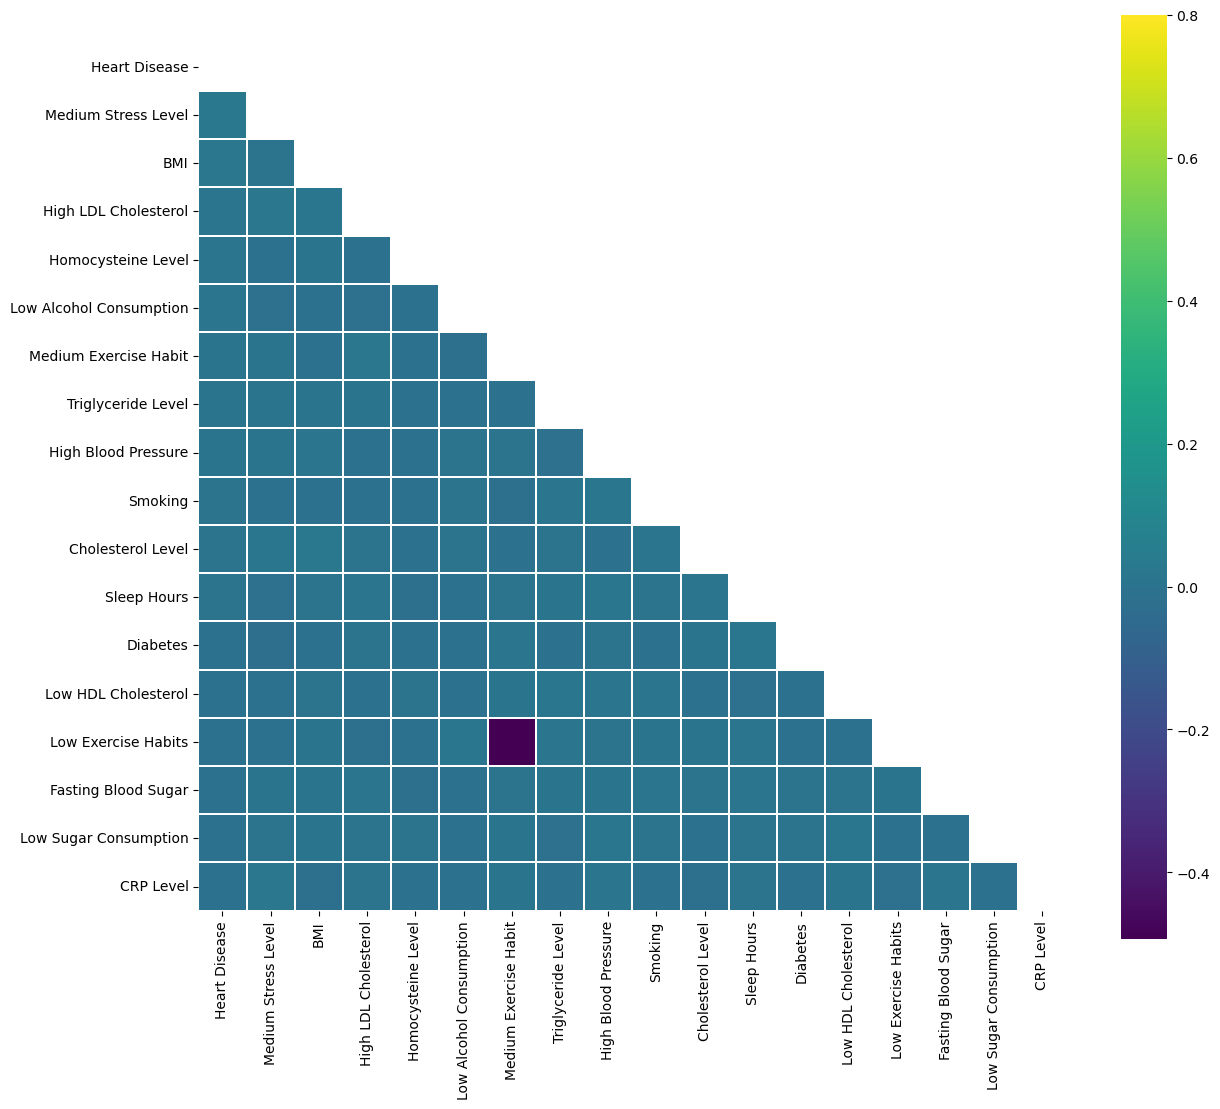

In [14]:
k = 18
cols = correlation.nlargest(k, 'Heart Disease')['Heart Disease'].index
print(cols)
cm = np.corrcoef(scaled_df[cols].values.T)
mask = np.triu(np.ones_like(cm))
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, mask=mask, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor="white", xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)

No need to encode binary representation for SVM, Ramdon Forest amd Logistoc Regression 

No need to encode binary representation for SVM, Ramdon Forest amd Logistoc Regression 

In [15]:
X = heart_disease_df.drop(columns='Heart Disease', axis=1)
y = heart_disease_df['Heart Disease']

In [16]:
X_train, X_test, y_train, y_test=train_test_split(heart_disease_df,y,test_size=0.1,random_state=0)

In [17]:
y_train

3037    False
8512     True
7603    False
4070    False
1495    False
        ...  
7891     True
9225     True
4859    False
3264    False
2732    False
Name: Heart Disease, Length: 8785, dtype: bool

In [18]:
# OneHotEncoder for y_train and y_test
encode_y = OneHotEncoder(drop='first', sparse_output=False)

# Reshape y_train and y_test to 2D
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Train the encoder
encode_y.fit(y_train_reshaped)

# Apply OneHotEncoder to y_train and y_test (no ravel for multiclass)
y_train_encoded = encode_y.transform(y_train_reshaped)
y_test_encoded = encode_y.transform(y_test_reshaped)

# PCA for dimensionality reduction
pca = PCA(n_components=0.95, random_state=42)

# Fit PCA on X_train and transform X_train and X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



In [19]:
# Create a OneHotEncoder
encode_y = OneHotEncoder(drop='first', sparse_output=False)

# Reshape y_train and y_test to be 2-dimensional
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Train the encoder
encode_y.fit(y_train_reshaped)

# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train_reshaped))
y_test_encoded = np.ravel(encode_y.transform(y_test_reshaped))

## Model Training

1. Logistic Regression

In [20]:
# Define and fit the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_pca, y_train_encoded.ravel())
logistic_train_score = lr_model.score(X_train_pca, y_train_encoded)
logistic_test_score = lr_model.score(X_test_pca, y_test_encoded)
logistic_preds = lr_model.predict(X_test_pca)
logistic_proba = lr_model.predict_proba(X_test_pca)[:, 1]
logistic_accuracy = accuracy_score(y_test_encoded, logistic_preds)
logistic_roc_auc = roc_auc_score(y_test_encoded, logistic_proba)

print("Logistic Regression Results:")
print(f"Training Score: {logistic_train_score:.2f}")
print(f"Testing Score: {logistic_test_score:.2f}")
print(f"Accuracy Score: {logistic_accuracy:.2f}")
print(classification_report(y_test_encoded, logistic_preds, target_names=["0", "1"], zero_division=0))

Logistic Regression Results:
Training Score: 0.80
Testing Score: 0.78
Accuracy Score: 0.78
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       765
           1       0.00      0.00      0.00       212

    accuracy                           0.78       977
   macro avg       0.39      0.50      0.44       977
weighted avg       0.61      0.78      0.69       977



In [21]:
# Generate predictions and probabilities
logistic_preds = lr_model.predict(X_test_pca)
logistic_proba = lr_model.predict_proba(X_test_pca)[:, 1]  # Probabilities for class 1

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    "Actual": y_test_encoded,       # Actual target values
    "Predicted": logistic_preds,    # Predicted class labels
    "Probability": logistic_proba   # Predicted probabilities for class 1
})

# Calculate accuracy score
logistic_accuracy = accuracy_score(y_test_encoded, logistic_preds)

# Calculate R-squared
logistic_r2 = r2_score(y_test_encoded, logistic_proba)

# Save predictions to a CSV file
output_path = "logistic_predictions.csv"  # Change to a valid path
predictions_df.to_csv(output_path, index=False)

# Print the results
print(f"Accuracy Score: {logistic_accuracy:.2f}")
print(f"R-squared: {logistic_r2:.2f}")

Accuracy Score: 0.78
R-squared: -0.00


In [22]:
# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train_encoded.ravel())

# Train the Logistic Regression model
lr_model_smote = LogisticRegression(random_state=42, max_iter=1000)
lr_model_smote.fit(X_train_balanced, y_train_balanced)

# Evaluate on the test set
logistic_smote_preds = lr_model_smote.predict(X_test_pca)
logistic_smote_proba = lr_model_smote.predict_proba(X_test_pca)[:, 1]

# Calculate metrics
logistic_smote_accuracy = accuracy_score(y_test_encoded, logistic_smote_preds)
logistic_smote_r2 = r2_score(y_test_encoded, logistic_smote_proba)

# Display results
print("Logistic Regression with SMOTE Results:")
print(f"Accuracy Score: {logistic_smote_accuracy:.2f}")
print(f"R2 Score: {logistic_smote_r2:.2f}")
print(classification_report(y_test_encoded, logistic_smote_preds, target_names=["0", "1"], zero_division=0))


Note: you may need to restart the kernel to use updated packages.
Logistic Regression with SMOTE Results:
Accuracy Score: 0.51
R2 Score: -0.47
              precision    recall  f1-score   support

           0       0.78      0.52      0.62       765
           1       0.21      0.47      0.29       212

    accuracy                           0.51       977
   macro avg       0.50      0.49      0.46       977
weighted avg       0.66      0.51      0.55       977



2. Random Forest

In [23]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train_pca, y_train_encoded.ravel())
# Random Forest evaluation
rf_train_score = rf_model.score(X_train_pca, y_train_encoded)
rf_test_score = rf_model.score(X_test_pca, y_test_encoded)
rf_preds = rf_model.predict(X_test_pca)
rf_proba = rf_model.predict_proba(X_test_pca)[:, 1]
rf_accuracy = accuracy_score(y_test_encoded, rf_preds)
rf_roc_auc = roc_auc_score(y_test_encoded, rf_proba)

print("Random Forest Results:")
print(f"Training Score: {rf_train_score:.2f}")
print(f"Testing Score: {rf_test_score:.2f}")
print(f"Accuracy Score: {rf_accuracy:.2f}")
print(classification_report(y_test_encoded, rf_preds, target_names=["0", "1"], zero_division=0))

Random Forest Results:
Training Score: 1.00
Testing Score: 0.78
Accuracy Score: 0.78
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       765
           1       0.00      0.00      0.00       212

    accuracy                           0.78       977
   macro avg       0.39      0.50      0.44       977
weighted avg       0.61      0.78      0.69       977



3.KNN

In [24]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_encoded.ravel())

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_balanced, y_train_balanced)

# Evaluate KNN
knn_preds = knn_model.predict(X_test)
knn_proba = knn_model.predict_proba(X_test)[:, 1]
knn_accuracy = accuracy_score(y_test_encoded, knn_preds)
knn_r2 = r2_score(y_test_encoded, knn_proba)

print("KNN with SMOTE Results:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"R-squared: {knn_r2:.2f}")
print(classification_report(y_test_encoded, knn_preds, target_names=["0", "1"], zero_division=0))


KNN with SMOTE Results:
Accuracy: 0.56
R-squared: -0.84
              precision    recall  f1-score   support

           0       0.80      0.59      0.68       765
           1       0.24      0.48      0.32       212

    accuracy                           0.56       977
   macro avg       0.52      0.53      0.50       977
weighted avg       0.68      0.56      0.60       977



In [25]:
from sklearn.metrics import accuracy_score, r2_score

# Assuming the KNN with SMOTE model is already trained and X_test, y_test are defined
# Generate predictions
knn_smote_preds = knn_model.predict(X_test)
knn_smote_proba = knn_model.predict_proba(X_test)[:, 1]

# Calculate accuracy score
knn_accuracy = accuracy_score(y_test, knn_smote_preds)

# Calculate R-squared
knn_r2 = r2_score(y_test, knn_smote_proba)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    "Actual": y_test,              # Actual values
    "Predicted": knn_smote_preds,  # Predicted values
    "Probability": knn_smote_proba # Predicted probabilities for class 1
})

# Save the predictions to a CSV file
output_path = "knn_smote_predictions.csv"  # Change to a valid path
predictions_df.to_csv(output_path, index=False)

# Print the results
print(f"Accuracy Score: {knn_accuracy:.2f}")
print(f"R-squared: {knn_r2:.2f}")



Accuracy Score: 0.56
R-squared: -0.84


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train_encoded.ravel())
# KNN evaluation
knn_train_score = knn_model.score(X_train_pca, y_train_encoded)
knn_test_score = knn_model.score(X_test_pca, y_test_encoded)
knn_preds = knn_model.predict(X_test_pca)
knn_proba = knn_model.predict_proba(X_test_pca)[:, 1]
knn_accuracy = accuracy_score(y_test_encoded, knn_preds)
knn_roc_auc = roc_auc_score(y_test_encoded, knn_proba)

print("KNN Results:")
print(f"Training Score: {knn_train_score:.2f}")
print(f"Testing Score: {knn_test_score:.2f}")
print(f"Accuracy Score: {knn_accuracy:.2f}")
print(classification_report(y_test_encoded, knn_preds, target_names=["0", "1"], zero_division=0))

KNN Results:
Training Score: 0.82
Testing Score: 0.75
Accuracy Score: 0.75
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       765
           1       0.25      0.07      0.11       212

    accuracy                           0.75       977
   macro avg       0.52      0.51      0.48       977
weighted avg       0.67      0.75      0.69       977



In [27]:
# Apply PCA transformation to X_test
X_test_pca = pca.transform(X_test)

# Generate predictions and probabilities
knn_preds = knn_model.predict(X_test_pca)
knn_proba = knn_model.predict_proba(X_test_pca)[:, 1]

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    "Actual": y_test_encoded,        # Actual target values
    "Predicted": knn_preds,          # Predicted class labels
    "Probability": knn_proba         # Predicted probabilities for class 1
})

# Calculate accuracy score
knn_accuracy = accuracy_score(y_test, knn_preds)

# Calculate R-squared
knn_r2 = r2_score(y_test, knn_proba)

# Save predictions to a CSV file
output_path = "knn_predictions.csv"  # Change to a valid path
predictions_df.to_csv(output_path, index=False)

# Print the results
print(f"Accuracy Score: {knn_accuracy:.2f}")
print(f"R-squared: {knn_r2:.2f}")

Accuracy Score: 0.75
R-squared: -0.19


## Model Evaluation

In [28]:
# Define parameter grid
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train_pca, y_train_encoded.ravel())

# Get the best model
best_knn_model = grid_search.best_estimator_

# Evaluate the best model
knn_preds = best_knn_model.predict(X_test_pca)
knn_proba = best_knn_model.predict_proba(X_test_pca)[:, 1]
knn_accuracy = accuracy_score(y_test_encoded, knn_preds)
knn_r2 = r2_score(y_test_encoded, knn_proba)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy Score: {knn_accuracy:.2f}")
print(f"R-squared: {knn_r2:.2f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy Score: 0.77
R-squared: -0.09


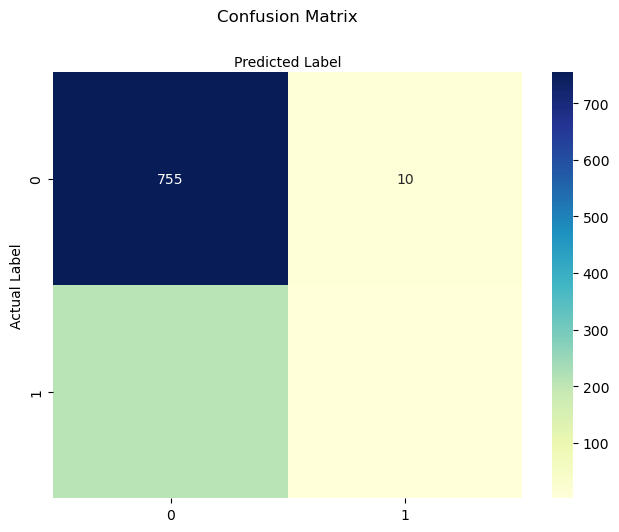

In [29]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test_encoded, knn_preds)
class_names = [0, 1]  # Class names

# Plot confusion matrix heatmap
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Initialize grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search to the data
grid_search.fit(X_train_pca, y_train_encoded.ravel())

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the model
best_rf_accuracy = best_rf_model.score(X_test_pca, y_test_encoded)
best_r2 = r2_score(y_test_encoded, best_rf_model.predict_proba(X_test_pca)[:, 1])   
print(f"Random Forest Model Accuracy: {best_rf_accuracy:.2f}")
print(f'R-squared: {best_r2:.2f}')